In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import sklearn.cross_validation
from sklearn.cross_validation import cross_val_score

In [23]:
avisos = pd.read_csv('Predecir/avisos_detalles_train.csv')
postulantes = pd.read_csv('Predecir/postulantes_datos_train.csv')
postulaciones = pd.read_csv('Predecir/postulaciones_train.csv')

In [24]:
del avisos['Unnamed: 0']
del postulantes['Unnamed: 0']
del postulaciones['Unnamed: 0']

In [25]:
postulantes.isnull().sum()

idpostulante                               0
nombre                                 41751
estado                                 41751
sexo                                       0
edad                                   19671
vistas_postulante                      18785
cant_dias_actividad                    18785
dia_inicio_actividad                   18785
dia_fin_actividad                      18785
postu_postulante                       59263
tipo_de_trabajo_popular_postu          61394
nivel_laboral_popular_postu            61394
nombre_area_popular_postu              61394
denominacion_empresa_popular_postu     61394
tipo_de_trabajo_popular_vistas         19952
nivel_laboral_popular_vistas           19952
nombre_area_popular_vistas             19952
denominacion_empresa_popular_vistas    19952
dtype: int64

In [26]:
use = ['idpostulante', 'nombre', 'estado', 'sexo', 'edad', 'vistas_postulante',\
      'cant_dias_actividad', 'tipo_de_trabajo_popular_vistas', 'nivel_laboral_popular_vistas',\
      'nombre_area_popular_vistas', 'denominacion_empresa_popular_vistas']
postulantes = postulantes.loc[:, use]

In [27]:
postulantes.isnull().sum()

idpostulante                               0
nombre                                 41751
estado                                 41751
sexo                                       0
edad                                   19671
vistas_postulante                      18785
cant_dias_actividad                    18785
tipo_de_trabajo_popular_vistas         19952
nivel_laboral_popular_vistas           19952
nombre_area_popular_vistas             19952
denominacion_empresa_popular_vistas    19952
dtype: int64

In [28]:
avisos.isnull().sum()

idaviso                      0
tipo_de_trabajo              0
nivel_laboral                0
nombre_area                  0
denominacion_empresa         0
web                          0
crecimiento                  0
capacitacion                 0
clima laboral                0
multinacional                0
incorp_inmediata             0
disponibilidad_horaria       0
disponibilidad_viajar        0
flexibilidad                 0
secundario                   0
terciario                    0
ingles                       0
estudiantes                  0
conoc_informatica            0
experiencia                  0
proactivo                    0
relaciones_pers              0
desarrollador                0
cajero                       0
vendedor                     0
ingeniero                    0
analista                     0
administrativo               0
junior                       0
jefe                         0
marketing                    0
supervisor                   0
online  

In [29]:
del avisos['postu_total']
del avisos['vistas_median']
del avisos['edad_popular_postu']
del avisos['nombre_popular_postu']
del avisos['online']
del avisos['hora_fin_cos']
del avisos['hora_fin_sen']
del avisos['hora_inicio_cos']
del avisos['hora_inicio_sen']
del avisos['dia_anio_inicio']
del avisos['dia_anio_fin']
del avisos['inicio_mes']
del avisos['fin_mes']
del avisos['dia_semana_inicio']
#del avisos['total_vistas']

In [30]:
avisos.isnull().sum()

idaviso                     0
tipo_de_trabajo             0
nivel_laboral               0
nombre_area                 0
denominacion_empresa        0
web                         0
crecimiento                 0
capacitacion                0
clima laboral               0
multinacional               0
incorp_inmediata            0
disponibilidad_horaria      0
disponibilidad_viajar       0
flexibilidad                0
secundario                  0
terciario                   0
ingles                      0
estudiantes                 0
conoc_informatica           0
experiencia                 0
proactivo                   0
relaciones_pers             0
desarrollador               0
cajero                      0
vendedor                    0
ingeniero                   0
analista                    0
administrativo              0
junior                      0
jefe                        0
marketing                   0
supervisor                  0
total_vistas               78
cant_dias 

In [31]:
avisos.head()

,idaviso,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,web,crecimiento,capacitacion,clima laboral,multinacional,...,analista,administrativo,junior,jefe,marketing,supervisor,total_vistas,cant_dias,edad_popular_vistas,nombre_popular_vistas
0,8725750,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,180.961191,26.0,26.0,3.0
1,17903700,1,1,2,2,0,0,0,0,0,...,0,0,0,0,0,0,1935.000000,51.0,36.0,3.0
2,1000150677,1,1,3,3,0,0,0,0,0,...,0,0,0,0,0,0,2.000000,3.0,38.0,1.0
3,1000610287,1,1,3,4,0,1,1,0,1,...,0,0,0,0,0,0,394.000000,83.0,50.0,1.0
4,1000872556,1,1,4,5,0,0,0,0,0,...,0,0,0,0,0,1,1.000000,0.0,25.0,1.0


In [32]:
postulantes.head()

,idpostulante,nombre,estado,sexo,edad,vistas_postulante,cant_dias_actividad,tipo_de_trabajo_popular_vistas,nivel_laboral_popular_vistas,nombre_area_popular_vistas,denominacion_empresa_popular_vistas
0,NdJl,4.0,1.0,2,49.0,60.0,88.0,1.0,3.0,10.0,140.0
1,1d2B,3.0,1.0,2,42.0,4.0,7.0,1.0,1.0,5.0,38.0
2,NPBx,5.0,1.0,2,37.0,34.0,81.0,1.0,1.0,10.0,410.0
3,ZKl5,5.0,1.0,2,44.0,41.0,89.0,1.0,5.0,1.0,173.0
4,Y043Z,3.0,1.0,2,39.0,12.0,50.0,1.0,1.0,25.0,269.0


In [33]:
postulantes.shape

(408146, 11)

In [34]:
postulantes_train = postulantes.loc[(postulantes['edad']>18.0)&(postulantes['edad']<60.0), :]

In [35]:
postulantes_train.shape

(383872, 11)

In [36]:
postulantes_train = postulantes_train.dropna()

In [37]:
postulantes_train.shape

(341363, 11)

In [38]:
avisos_train = avisos.copy()

In [39]:
avisos_train.shape

(19696, 36)

In [40]:
avisos_train = avisos_train.dropna()

In [41]:
avisos_train.shape

(19562, 36)

In [15]:
avisos_train.columns

Index(['idaviso', 'tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa', 'web', 'crecimiento', 'capacitacion',
       'clima laboral', 'multinacional', 'incorp_inmediata',
       'disponibilidad_horaria', 'disponibilidad_viajar', 'flexibilidad',
       'secundario', 'terciario', 'ingles', 'estudiantes', 'conoc_informatica',
       'experiencia', 'proactivo', 'relaciones_pers', 'desarrollador',
       'cajero', 'vendedor', 'ingeniero', 'analista', 'administrativo',
       'junior', 'jefe', 'marketing', 'supervisor', 'total_vistas',
       'cant_dias', 'edad_popular_vistas', 'nombre_popular_vistas'],
      dtype='object')

In [42]:
avisos_train.columns

Index(['idaviso', 'tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa', 'web', 'crecimiento', 'capacitacion',
       'clima laboral', 'multinacional', 'incorp_inmediata',
       'disponibilidad_horaria', 'disponibilidad_viajar', 'flexibilidad',
       'secundario', 'terciario', 'ingles', 'estudiantes', 'conoc_informatica',
       'experiencia', 'proactivo', 'relaciones_pers', 'desarrollador',
       'cajero', 'vendedor', 'ingeniero', 'analista', 'administrativo',
       'junior', 'jefe', 'marketing', 'supervisor', 'total_vistas',
       'cant_dias', 'edad_popular_vistas', 'nombre_popular_vistas'],
      dtype='object')

In [43]:
avisos_train['total_vistas'].mean()

557.7809853024296

In [44]:
avisos_train['total_vistas'].median()

211.0

In [45]:
avisos_train['cant_dias'].mean()

28.789949902872916

In [29]:
#avisos_train = avisos_train.loc[(avisos_train['cant_dias'] < 35), :]

In [30]:
#avisos_train = avisos_train.loc[(avisos_train['cant_dias'] > 0)&(avisos_train['total_vistas'] <= 1500.0)\
#                               &(avisos_train['total_vistas']>100.0), :]

In [29]:
#avisos_train = avisos_train.loc[(avisos_train['total_vistas'] <= 10000.0)\
 #                              &(avisos_train['total_vistas']>10.0), :]

In [46]:
avisos_train.shape

(19562, 36)

In [47]:
avisos_si = avisos_train.copy()
avisos_si['se_postulo'] = 1

In [48]:
postulaciones.shape

(6603752, 2)

Muy grande para procesar, procesamos por bloques random y calculamos un promedio general

In [49]:
postulaciones = postulaciones.sample(frac=0.10)

In [50]:
postulaciones.shape

(660375, 2)

In [51]:
postulaciones = pd.merge(postulaciones, avisos_si, how='inner', on=['idaviso'])

In [52]:
postulaciones.shape

(618725, 38)

In [53]:
postulaciones = pd.merge(postulaciones, postulantes_train, how='inner', on=['idpostulante'])

In [54]:
postulaciones.shape

(589102, 48)

In [55]:
postulaciones.head()

,idaviso,idpostulante,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,web,crecimiento,capacitacion,clima laboral,...,nombre,estado,sexo,edad,vistas_postulante,cant_dias_actividad,tipo_de_trabajo_popular_vistas,nivel_laboral_popular_vistas,nombre_area_popular_vistas,denominacion_empresa_popular_vistas
0,1112264559,vV9vm2E,2,4,1,722,1,0,1,0,...,1.0,2.0,1,20.0,30.0,25.0,1.0,1.0,5.0,333.0
1,1112326604,vV9vm2E,1,1,10,2157,0,0,0,0,...,1.0,2.0,1,20.0,30.0,25.0,1.0,1.0,5.0,333.0
2,1112264559,5mqE5Jz,2,4,1,722,1,0,1,0,...,1.0,2.0,1,20.0,121.0,85.0,1.0,2.0,46.0,27.0
3,1111640028,5mqE5Jz,2,1,6,17,0,0,0,0,...,1.0,2.0,1,20.0,121.0,85.0,1.0,2.0,46.0,27.0
4,1112414415,5mqE5Jz,1,2,46,1043,0,0,0,1,...,1.0,2.0,1,20.0,121.0,85.0,1.0,2.0,46.0,27.0


Contamos cuantos postulados = 1 tenemos para ver cuantos 0 ponemos

In [56]:
postulaciones.shape

(589102, 48)

Probamos un 50% aprox de ceros en relacion a los unos

In [57]:
len(postulaciones[postulaciones["se_postulo"]==1])

589102

In [58]:
def random_fill(row):
    return np.random.choice(avisos_train['idaviso'])

In [59]:
while (len(postulaciones[postulaciones["se_postulo"]==1])*1 > len(postulaciones[postulaciones["se_postulo"]==0])):
    relleno = postulantes_train.sample(frac=0.5).copy()
    #relleno['idaviso'] = np.nan
    relleno['idaviso'] = relleno.apply(random_fill, axis=1)
    relleno = pd.merge(relleno, avisos_train, how='inner', on=['idaviso'])
    postulaciones = pd.merge(postulaciones, relleno, how='outer')
    postulaciones = postulaciones.fillna({'se_postulo' : 0})
    print(len(postulaciones[postulaciones["se_postulo"]==0]))

170667
341329
511990
682644


In [60]:
postulaciones.shape

(1271746, 48)

In [61]:
se_postulo = postulaciones['se_postulo']
del postulaciones['se_postulo']
del postulaciones['idaviso']
del postulaciones['idpostulante']

# Checking outliers

In [42]:
isolationforest = IsolationForest(random_state=103040)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(postulaciones, se_postulo, test_size=0.30, random_state=42)

In [ ]:
isolationforest.fit(X_train, y_train)

# DecisionTree

In [62]:
decisiontree = DecisionTreeClassifier(random_state=103040)
decisiontree.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 103040,
 'splitter': 'best'}

In [63]:
X_train, X_test, y_train, y_test = train_test_split(postulaciones, se_postulo, test_size=0.30, random_state=42)

In [64]:
param_grid= {'max_features': ["auto"], 'criterion': ['gini', 'entropy']}
grid_drop = GridSearchCV(decisiontree, param_grid, cv=3, scoring='roc_auc')
grid_drop.fit(X_train, y_train)
print(grid_drop.best_params_, grid_drop.best_score_)

{'criterion': 'entropy', 'max_features': 'auto'} 0.781144737174


In [60]:
grid_drop.best_estimator_.feature_importances_  

array([ 0.003063  ,  0.00757679,  0.02184974,  0.02295067,  0.00124148,
        0.00272478,  0.00299961,  0.00240157,  0.00236942,  0.00176694,
        0.00304031,  0.00260539,  0.00160982,  0.0029878 ,  0.00099119,
        0.00288017,  0.00377806,  0.00416577,  0.003345  ,  0.00332197,
        0.00298235,  0.0037002 ,  0.00166981,  0.00248888,  0.00249027,
        0.0027071 ,  0.00430574,  0.00136449,  0.00247681,  0.00364496,
        0.00181302,  0.16520667,  0.08642283,  0.01009028,  0.02978728,
        0.03442068,  0.02701572,  0.02344206,  0.00079641,  0.0009479 ,
        0.02267496,  0.00631652,  0.01829213,  0.01017497,  0.011087  ,
        0.03670026,  0.15472326,  0.004232  ,  0.00766061,  0.03772365,
        0.03685093,  0.07276939,  0.07535137])

In [61]:
postulaciones.columns

Index(['tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa', 'web', 'crecimiento', 'capacitacion',
       'clima laboral', 'multinacional', 'incorp_inmediata',
       'disponibilidad_horaria', 'disponibilidad_viajar', 'flexibilidad',
       'secundario', 'terciario', 'ingles', 'estudiantes', 'conoc_informatica',
       'experiencia', 'proactivo', 'relaciones_pers', 'desarrollador',
       'cajero', 'vendedor', 'ingeniero', 'analista', 'administrativo',
       'junior', 'jefe', 'marketing', 'supervisor', 'total_vistas',
       'cant_dias', 'dia_semana_inicio', 'dia_anio_inicio', 'dia_anio_fin',
       'hora_inicio_cos', 'hora_inicio_sen', 'inicio_mes', 'fin_mes',
       'edad_popular_vistas', 'nombre_popular_vistas', 'nombre', 'estado',
       'sexo', 'edad', 'vistas_postulante', 'tipo_de_trabajo_popular_vistas',
       'nivel_laboral_popular_vistas', 'nombre_area_popular_vistas',
       'denominacion_empresa_popular_vistas', 'dia_inicio_actividad',
       'd

In [91]:
im = grid_drop.best_estimator_.feature_importances_
cols = postulaciones.columns

im, cols = zip(*sorted(zip(im, cols)))

plt.barh(list(range(cols)), im, align='center')
plt.xlabel("Importancia feature")
plt.ylabel("Features")
plt.title("Importancia de cada features")
plt.show()

TypeError: 'tuple' object cannot be interpreted as an integer

In [93]:
range(list(cols))

TypeError: 'list' object cannot be interpreted as an integer

In [62]:
result = grid_drop.best_estimator_.predict_proba(X_test)[:,1]

In [65]:
roc_auc_score(y_test, result)

0.79428182507881051

In [36]:
grid_drop.score(X_test, y_test)

0.76263399469722504

# RandomForest

In [26]:
randomforesttree = RandomForestClassifier(random_state=103040, n_jobs=-1)
randomforesttree.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 103040,
 'verbose': 0,
 'warm_start': False}

In [27]:
X_train, X_test, y_train, y_test = train_test_split(postulaciones, se_postulo, test_size=0.30, random_state=42)

In [28]:
param_grid= {'max_features': ["auto", "sqrt"], 'n_estimators': [80]}
grid_drop = GridSearchCV(randomforesttree, param_grid, cv=5, scoring='roc_auc')
grid_drop.fit(X_train, y_train)
print(grid_drop.best_params_, grid_drop.best_score_)

{'max_features': 'auto', 'n_estimators': 80} 0.94514612629


In [29]:
result = grid_drop.best_estimator_.predict_proba(X_test)[:,1]

In [30]:
roc_auc_score(y_test, result)

0.9470982092479987

In [ ]:
im = grid_drop.best_estimator_.feature_importances_
cols = postulaciones.columns

im, cols = zip(*sorted(zip(im, cols)))

plt.barh(range(cols), im, align='center')
plt.xlabel("Importancia feature")
plt.ylabel("Features")
plt.title("Importancia de cada features")
plt.show()

# Graficos

In [ ]:
sc = []

for i in range(2, 71):
    randfor = RandomForestClassifier(random_state=239223, n_estimators=i, n_jobs=-1)
    val = cross_val_score(randfor, X_train, y_train, cv=5)
    sc.append(val)

In [ ]:
sns.boxplot(data=sc)
plt.xlabel("Estimadores")
plt.ylabel("Scores")
plt.show()

In [ ]:
sc1 = []

for i in range(2, 71):
    randfor = RandomForestClassifier(random_state=239223, n_estimators=i, n_jobs=-1)
    val = cross_val_score(randfor, X_train, y_train, cv=3, scoring='f1')
    sc1.append(val)

In [ ]:
sns.boxplot(data=sc1)
plt.xlabel("Estimadores")
plt.ylabel("Scores")
plt.show()

# SVD + Regressors

In [95]:
pipe = Pipeline([('svd', TruncatedSVD(random_state=103040, n_components=4)),
                 ('tree', DecisionTreeClassifier(random_state=103040))])
pipe.get_params().keys()

dict_keys(['steps', 'svd', 'tree', 'svd__algorithm', 'svd__n_components', 'svd__n_iter', 'svd__random_state', 'svd__tol', 'tree__class_weight', 'tree__criterion', 'tree__max_depth', 'tree__max_features', 'tree__max_leaf_nodes', 'tree__min_impurity_split', 'tree__min_samples_leaf', 'tree__min_samples_split', 'tree__min_weight_fraction_leaf', 'tree__presort', 'tree__random_state', 'tree__splitter'])

In [96]:
X_train, X_test, y_train, y_test = train_test_split(postulaciones, se_postulo, test_size=0.30, random_state=42)

In [97]:
param_grid= {'tree__max_features': ["auto"], 'tree__criterion': ['gini', 'entropy']}
grid_drop = GridSearchCV(pipe, param_grid, cv=3, scoring='roc_auc')
grid_drop.fit(X_train, y_train)
print(grid_drop.best_params_, grid_drop.best_score_)

{'tree__criterion': 'entropy', 'tree__max_features': 'auto'} 0.74848888419


In [98]:
pipe = Pipeline([('svd', TruncatedSVD(random_state=103040, n_components=4)),
                 ('log', LogisticRegression(random_state=103040))])
pipe.get_params().keys()

dict_keys(['steps', 'svd', 'log', 'svd__algorithm', 'svd__n_components', 'svd__n_iter', 'svd__random_state', 'svd__tol', 'log__C', 'log__class_weight', 'log__dual', 'log__fit_intercept', 'log__intercept_scaling', 'log__max_iter', 'log__multi_class', 'log__n_jobs', 'log__penalty', 'log__random_state', 'log__solver', 'log__tol', 'log__verbose', 'log__warm_start'])

In [99]:
param_grid= {'svd__n_components':[2, 4, 5, 10]}
grid_drop = GridSearchCV(pipe, param_grid, cv=3, scoring='roc_auc')
grid_drop.fit(X_train, y_train)
print(grid_drop.best_params_, grid_drop.best_score_)

{'svd__n_components': 5} 0.880740481892


In [100]:
result = grid_drop.best_estimator_.predict(X_test)

In [101]:
roc_auc_score(y_test, result)

0.73793657488131614

In [104]:
features = list(postulaciones.columns.values)

In [92]:
postulaciones.shape

(1332030, 39)

In [102]:
svd = TruncatedSVD(random_state=103040, n_components=4)

In [105]:
x = postulaciones.loc[:, features].values

In [95]:
y = se_postulo.values

In [96]:
XRed = svd.fit_transform(x)

In [97]:
svd.explained_variance_ratio_

array([  9.57401944e-01,   4.24680688e-02,   7.63232104e-05,
         4.24730936e-05])

In [98]:
svd.explained_variance_ratio_.cumsum()

array([ 0.95740194,  0.99987001,  0.99994634,  0.99998881])

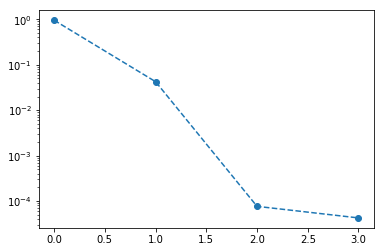

In [99]:
plt.semilogy(svd.explained_variance_ratio_, '--o')

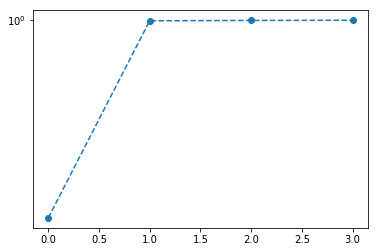

In [100]:
plt.semilogy(svd.explained_variance_ratio_.cumsum(), '--o')

# GradientBoostingClassifier

In [98]:
gradientboost = GradientBoostingClassifier(random_state=103040)
gradientboost.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': 103040,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [99]:
param_grid= {'max_features': ["auto"], 'loss': ['deviance', 'exponential']}
grid_drop = GridSearchCV(gradientboost, param_grid, cv=3, scoring='roc_auc')
grid_drop.fit(X_train, y_train)
print(grid_drop.best_params_, grid_drop.best_score_)

{'loss': 'deviance', 'max_features': 'auto'} 0.717652444709


In [100]:
result2 = grid_drop.best_estimator_.predict(X_test)

In [101]:
roc_auc_score(y_test, result)

0.78668376558947539

# Predicción

In [51]:
to_predict = pd.read_csv('Predecir/test_final_100k.csv')

In [52]:
to_predict.shape

(100000, 3)

In [53]:
avisos = pd.read_csv('Predecir/avisos_detalles_predict.csv')
postulantes = pd.read_csv('Predecir/postulantes_datos_predict.csv')

In [54]:
to_predict_or = pd.merge(to_predict, avisos, on=['idaviso'], how='inner')

In [55]:
to_predict_or.shape

(100000, 53)

In [56]:
to_predict_or = pd.merge(to_predict_or, postulantes, on=['idpostulante'], how='inner')

In [57]:
to_predict_or.shape

(100000, 71)

In [59]:
del to_predict_or['Unnamed: 0_x']
del to_predict_or['Unnamed: 0_y']
del to_predict_or['idaviso']
del to_predict_or['idpostulante']
del to_predict_or['postu_total']
del to_predict_or['online']
ids = to_predict_or['id']
del to_predict_or['id']
del to_predict_or['vistas_median']

In [60]:
del to_predict_or['edad_popular_postu']

In [61]:
del to_predict_or['nombre_popular_postu']
del to_predict_or['postu_postulante']
del to_predict_or['tipo_de_trabajo_popular_postu']
del to_predict_or['nivel_laboral_popular_postu']
del to_predict_or['nombre_area_popular_postu']
del to_predict_or['denominacion_empresa_popular_postu']

In [45]:
del to_predict_or['hora_fin_cos']
del to_predict_or['hora_fin_sen']
del to_predict_or['hora_inicio_cos']
del to_predict_or['hora_inicio_sen']
del to_predict_or['inicio_mes']
del to_predict_or['fin_mes']
del to_predict_or['dia_anio_inicio']
del to_predict_or['dia_anio_fin']
del to_predict_or['dia_semana_inicio']
del to_predict_or['dia_inicio_actividad']
del to_predict_or['dia_fin_actividad']

In [105]:
to_predict_or.isnull().sum()

tipo_de_trabajo                        0
nivel_laboral                          0
nombre_area                            0
denominacion_empresa                   0
web                                    0
crecimiento                            0
capacitacion                           0
clima laboral                          0
multinacional                          0
incorp_inmediata                       0
disponibilidad_horaria                 0
disponibilidad_viajar                  0
flexibilidad                           0
secundario                             0
terciario                              0
ingles                                 0
estudiantes                            0
conoc_informatica                      0
experiencia                            0
proactivo                              0
relaciones_pers                        0
desarrollador                          0
cajero                                 0
vendedor                               0
ingeniero       

In [36]:
to_predict_or = to_predict_or.fillna({'total_vistas':avisos_train['total_vistas'].mean(),\
                                      'cant_dias':avisos_train['cant_dias'].mean(),\
                                     'edad_popular_vistas':avisos_train['edad_popular_vistas'].mean(),\
                                     'nombre_popular_vistas':avisos_train['nombre_popular_vistas'].mean(),\
                                     'nombre':postulantes_train['nombre'].mean(),\
                                     'estado':postulantes_train['estado'].mean(),\
                                     'edad':postulantes_train['edad'].mean(),\
                                     'vistas_postulante':postulantes_train['vistas_postulante'].mean(),\
                                     'tipo_de_trabajo_popular_vistas':postulantes_train['tipo_de_trabajo_popular_vistas'].mean(),\
                                     'nivel_laboral_popular_vistas':postulantes_train['nivel_laboral_popular_vistas'].mean(),\
                                     'nombre_area_popular_vistas':postulantes_train['nombre_area_popular_vistas'].mean(),\
                                     'denominacion_empresa_popular_vistas':postulantes_train['denominacion_empresa_popular_vistas'].mean(),\
                                     'dia_semana_inicio':avisos_train['dia_semana_inicio'].mean(),\
                                     'dia_anio_inicio':avisos_train['dia_anio_inicio'].mean(),\
                                     'dia_anio_fin':avisos_train['dia_anio_fin'].mean(),\
                                     'hora_inicio_cos':avisos_train['hora_inicio_cos'].mean(),\
                                     'hora_inicio_sen':avisos_train['hora_inicio_sen'].mean(),\
                                     'inicio_mes':avisos_train['inicio_mes'].mean(),\
                                     'fin_mes':avisos_train['fin_mes'].mean(),\
                                     'dia_inicio_actividad':postulantes_train['dia_inicio_actividad'].mean(),\
                                     'dia_fin_actividad':postulantes_train['dia_fin_actividad'].mean()})

In [44]:
to_predict_or = to_predict_or.fillna({'total_vistas':avisos_train['total_vistas'].mean(),\
                                      'cant_dias':avisos_train['cant_dias'].mean(),\
                                     'edad_popular_vistas':avisos_train['edad_popular_vistas'].mean(),\
                                     'nombre_popular_vistas':avisos_train['nombre_popular_vistas'].mean(),\
                                     'nombre':postulantes_train['nombre'].mean(),\
                                     'estado':postulantes_train['estado'].mean(),\
                                     'edad':postulantes_train['edad'].mean(),\
                                     'vistas_postulante':postulantes_train['vistas_postulante'].mean(),\
                                      'cant_dias_actividad':postulantes_train['cant_dias_actividad'].mean(),\
                                     'tipo_de_trabajo_popular_vistas':postulantes_train['tipo_de_trabajo_popular_vistas'].mean(),\
                                     'nivel_laboral_popular_vistas':postulantes_train['nivel_laboral_popular_vistas'].mean(),\
                                     'nombre_area_popular_vistas':postulantes_train['nombre_area_popular_vistas'].mean(),\
                                     'denominacion_empresa_popular_vistas':postulantes_train['denominacion_empresa_popular_vistas'].mean()})

In [45]:
prediccion = grid_drop.best_estimator_.predict_proba(to_predict_or)[:,1]

In [46]:
prediccion

array([ 0.0375,  0.0625,  0.0125, ...,  0.475 ,  0.4625,  0.2125])

In [47]:
predicciones = pd.DataFrame({'id':ids,'sepostulo':prediccion})

In [48]:
predicciones.to_csv('Predecir/final_gra.csv', index=False)

In [49]:
predicciones.head()

,id,sepostulo
0,0,0.0375
1,1,0.0625
2,2,0.0125
3,3,0.0750
4,4,0.0125


In [50]:
predicciones['sepostulo'].value_counts()

0.9375    2474
0.9500    2440
0.9625    2422
0.9750    2401
0.9250    2332
0.0125    2248
0.9125    2177
0.9875    2152
0.0250    2145
0.9000    2008
0.0000    1949
0.8875    1946
0.0375    1899
0.0500    1832
0.8750    1792
0.8625    1597
0.0625    1595
0.8500    1524
0.0750    1522
0.8375    1483
1.0000    1413
0.8250    1397
0.8125    1374
0.0875    1351
0.8000    1313
0.1000    1284
0.1125    1232
0.7875    1230
0.7625    1195
0.7750    1176
          ... 
0.5125     902
0.5625     897
0.3375     894
0.5250     894
0.3250     893
0.3000     893
0.2625     890
0.6125     875
0.6625     874
0.5500     874
0.3500     871
0.5875     871
0.6250     870
0.6000     866
0.2750     865
0.3875     864
0.4625     862
0.5375     860
0.3625     855
0.3750     847
0.5750     844
0.3125     838
0.4125     830
0.4500     829
0.4375     826
0.4250     821
0.4000     818
0.4750     817
0.5000     815
0.4875     813
Name: sepostulo, Length: 81, dtype: int64

In [51]:
def asd(row):
    if (row['sepostulo']<=0.33):
        return 0.0
    elif (row['sepostulo']>=0.66):
        return 1.0
    return row['sepostulo']

predicciones['sepostulo'] = predicciones.apply(asd, axis=1)

In [ ]:
predicciones.to_csv('Predecir/final_rounded.csv', index=False)

In [62]:
predicciones = pd.read_csv('Predecir/final_gra.csv')

In [63]:
predicciones.head()

,id,sepostulo
0,0,0.0375
1,1,0.0625
2,2,0.0125
3,3,0.0750
4,4,0.0125


In [64]:
to_predict_or.head()

,id,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,web,crecimiento,capacitacion,clima laboral,multinacional,...,sexo,edad,vistas_postulante,cant_dias_actividad,dia_inicio_actividad,dia_fin_actividad,tipo_de_trabajo_popular_vistas,nivel_laboral_popular_vistas,nombre_area_popular_vistas,denominacion_empresa_popular_vistas
0,0,1,3,1,1424,0,0,0,0,0,...,1,42.0,33.0,85.0,26.0,112.0,1.0,1.0,1.0,1269.0
1,1,1,3,1,1424,0,0,0,0,0,...,2,31.0,68.0,64.0,17.0,81.0,1.0,1.0,5.0,10.0
2,2,1,3,1,1424,0,0,0,0,0,...,1,36.0,12.0,15.0,100.0,116.0,1.0,1.0,5.0,120.0
3,3,1,4,25,3725,0,0,0,0,0,...,2,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,4,25,3725,0,0,0,0,0,...,1,32.0,3.0,0.0,82.0,82.0,1.0,1.0,32.0,78.0


In [65]:
to_predict_or = pd.merge(to_predict_or, predicciones, on=['id'], how='inner')

In [66]:
to_predict_or.head()

,id,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,web,crecimiento,capacitacion,clima laboral,multinacional,...,edad,vistas_postulante,cant_dias_actividad,dia_inicio_actividad,dia_fin_actividad,tipo_de_trabajo_popular_vistas,nivel_laboral_popular_vistas,nombre_area_popular_vistas,denominacion_empresa_popular_vistas,sepostulo
0,0,1,3,1,1424,0,0,0,0,0,...,42.0,33.0,85.0,26.0,112.0,1.0,1.0,1.0,1269.0,0.0375
1,1,1,3,1,1424,0,0,0,0,0,...,31.0,68.0,64.0,17.0,81.0,1.0,1.0,5.0,10.0,0.0625
2,2,1,3,1,1424,0,0,0,0,0,...,36.0,12.0,15.0,100.0,116.0,1.0,1.0,5.0,120.0,0.0125
3,3,1,4,25,3725,0,0,0,0,0,...,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0750
4,4,1,4,25,3725,0,0,0,0,0,...,32.0,3.0,0.0,82.0,82.0,1.0,1.0,32.0,78.0,0.0125


In [67]:
to_predict_or_rounds = to_predict_or.loc[((to_predict_or['dia_inicio_actividad']<to_predict_or['dia_anio_inicio'])\
                                        &(to_predict_or['dia_fin_actividad']<to_predict_or['dia_anio_inicio']))\
                                         or((to_predict_or['dia_inicio_actividad']>to_predict_or['dia_anio_fin'])\
                                        &(to_predict_or['dia_fin_actividad']>to_predict_or['dia_anio_fin'])), ['id', 'sepostulo']]

In [71]:
to_predict_or_rounds = to_predict_or.loc[((to_predict_or['dia_fin_actividad']<to_predict_or['dia_anio_inicio'])\
                                        |(to_predict_or['dia_inicio_actividad']>to_predict_or['dia_anio_fin'])), ['id', 'sepostulo']]

In [77]:
to_predict_or_rounds['sepostulo'] = 0

In [78]:
to_predict_or_rounds.head()

,id,sepostulo
0,0,0
1,1,0
4,4,0
8,8,0
10,10,0


In [80]:
to_predict_or_rounds.rename(columns={'sepostulo': 'valor'}, inplace=True)

In [81]:
to_predict_or_rounds.head()

,id,valor
0,0,0
1,1,0
4,4,0
8,8,0
10,10,0


In [82]:
predicciones_rounded = pd.merge(predicciones, to_predict_or_rounds, how='left', on=['id'])

In [84]:
def replace(row):
    if (np.isnan(row['valor']) == False):
        return row['valor']
    return row['sepostulo']

In [83]:
predicciones_rounded.head()

,id,sepostulo,valor
0,0,0.0375,0.0
1,1,0.0625,0.0
2,2,0.0125,NaN
3,3,0.0750,NaN
4,4,0.0125,0.0


In [85]:
predicciones_rounded['sepostulo'] = predicciones_rounded.apply(replace, axis=1)

In [89]:
predicciones_rounded.head()

,id,sepostulo
0,0,0.0000
1,1,0.0000
2,2,0.0125
3,3,0.0750
4,4,0.0000


In [87]:
del predicciones_rounded['valor']

In [88]:
predicciones_rounded.to_csv('Predecir/final_gra_rounded.csv', index=False)